<a href="https://colab.research.google.com/github/AdaSHAO1111/FYP/blob/main/CNNtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
# Add this to your notebook to handle statsmodels import:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Try to import statsmodels or install it if missing
try:
    import statsmodels.api as sm
    from matplotlib.ticker import MultipleLocator
    print("statsmodels successfully imported")
except ImportError:
    print("Installing statsmodels...")
    !pip install statsmodels
    import statsmodels.api as sm
    from matplotlib.ticker import MultipleLocator
    print("statsmodels installed and imported") 

statsmodels successfully imported


In [3]:
file_path = "/Users/shaoxinyi/Downloads/FYP/1740465051536_CompassGyroSumHeadingData.txt" # works

# Read the CSV file into a DataFrame
collected_data = pd.read_csv(file_path, delimiter=';')


# Find the index of the first occurrence of 'Initial_Location'
initial_location_index = collected_data[collected_data['Type'] == 'Initial_Location'].index[0]

# Slice the DataFrame from the first occurrence onwards
data = collected_data.iloc[initial_location_index:].reset_index(drop=True)

# Now 'filtered_data' contains the data recorded after the first 'Initial_Location'


# Display the DataFrame
data

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,1740465065099,Initial_Location,0.0,Manual,2.207694,6.925995,0.0,836559.48563,818602.936434,0
1,1740465065101,Gyro,0.0,-0.018711451,2.226405,5.671234,0.0,0.00000,0.000000,0
2,1740465065107,Gyro,0.0,-0.012472466,2.238878,5.671234,0.0,0.00000,0.000000,0
3,1740465065113,Compass,0.0,69.41704806817991,2.238878,5.671234,0.0,0.00000,0.000000,0
4,1740465065118,Gyro,0.0,-0.013881013,2.252759,8.664886,0.0,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
29199,1740465231391,Compass,154.5,40.429433121180416,29.451498,326.741240,0.0,0.00000,0.000000,6
29200,1740465231393,Gyro,154.5,-0.0011019802,29.452600,326.668240,0.0,0.00000,0.000000,6
29201,1740465231394,Compass,154.5,40.3882524690039,29.452600,326.668240,0.0,0.00000,0.000000,6
29202,1740465231395,Gyro,154.5,0.017077776,29.435522,326.489870,0.0,0.00000,0.000000,6


In [4]:
first_rows_unique_step = data.groupby('step').first().reset_index()
first_rows_unique_step

,step,Timestamp_(ms),Type,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,0.0,1740465065099,Initial_Location,Manual,2.207694,6.925995,0.0,836559.48563,818602.936434,0
1,0.5,1740465068540,Gyro,-0.01593154,0.110556,6.049042,0.0,0.00000,0.000000,0
2,1.0,1740465068850,Gyro,-0.14006872,5.097632,357.829740,0.0,0.00000,0.000000,0
3,1.5,1740465071512,Gyro,-0.1882526,9.095385,357.990300,0.0,0.00000,0.000000,0
4,2.0,1740465071979,Gyro,0.025366668,8.946061,352.570370,0.0,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
305,152.5,1740465212004,Compass,48.00329578528957,19.320045,332.589170,0.0,0.00000,0.000000,6
306,153.0,1740465212463,Compass,47.370382360711424,16.651384,336.257420,0.0,0.00000,0.000000,6
307,153.5,1740465212766,Compass,45.61849268662874,16.483976,324.783100,0.0,0.00000,0.000000,6
308,154.0,1740465213063,Compass,43.25912114803074,17.369349,319.228550,0.0,0.00000,0.000000,6


In [5]:
initial_location_data = data[data['Type'] == 'Initial_Location'].reset_index(drop=True)
initial_location_data

initial_position = (initial_location_data['value_4'][0],initial_location_data['value_5'][0])
initial_position

(np.float64(836559.4856303189), np.float64(818602.936434033))

In [6]:
ground_truth_location_data = data[(data['Type'] == 'Ground_truth_Location') | (data['Type'] == 'Initial_Location')].reset_index(drop=True)

ground_truth_location_data

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,1740465065099,Initial_Location,0.0,Manual,2.207694,6.925995,0.0,836559.485630,818602.936434,0
1,1740465083000,Ground_truth_Location,16.0,Map Long Click,3.495401,325.732670,0.0,836562.421917,818611.351828,0
2,1740465086314,Ground_truth_Location,16.0,Map Long Click,5.157123,325.204250,0.0,836562.525530,818612.691414,0
3,1740465088149,Ground_truth_Location,16.0,Map Long Click,5.303997,325.732420,0.0,836562.525530,818612.691414,0
4,1740465089693,Ground_truth_Location,16.0,Map Long Click,5.281964,324.684800,0.0,836562.525530,818612.691414,0
5,1740465091226,Ground_truth_Location,16.0,Map Long Click,5.511052,325.297550,0.0,836562.525530,818612.691414,0
6,1740465092610,Ground_truth_Location,16.0,Map Long Click,5.827023,324.861500,0.0,836562.525530,818612.691414,0
7,1740465096487,Ground_truth_Location,16.0,Map Long Click,5.836483,325.782960,0.0,836564.080079,818614.786691,0
8,1740465100542,Ground_truth_Location,16.0,Ending Marker Drag,5.114553,324.365300,0.0,836561.730983,818611.626601,0
9,1740465118378,Ground_truth_Location,33.5,Map Long Click,-84.675430,301.419770,0.0,836551.988833,818614.408628,1


In [7]:
# Sort the DataFrame by the 'step' column
ground_truth_location_data.sort_values(by='step', inplace=True)

# Drop duplicates based on the 'step' column, keeping the last occurrence
ground_truth_location_data.drop_duplicates(subset='step', keep='last', inplace=True)

# Reset the index after dropping duplicates
ground_truth_location_data.reset_index(drop=True, inplace=True)
ground_truth_location_data

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,1740465065099,Initial_Location,0.0,Manual,2.207694,6.925995,0.0,836559.485630,818602.936434,0
1,1740465100542,Ground_truth_Location,16.0,Ending Marker Drag,5.114553,324.365300,0.0,836561.730983,818611.626601,0
2,1740465118378,Ground_truth_Location,33.5,Map Long Click,-84.675430,301.419770,0.0,836551.988833,818614.408628,1
3,1740465140297,Ground_truth_Location,60.5,Map Long Click,-1.189965,326.896150,0.0,836556.686830,818631.170679,2
4,1740465149599,Ground_truth_Location,64.0,Map Long Click,-82.401596,297.136840,0.0,836553.888544,818632.613253,3
5,1740465162879,Ground_truth_Location,79.0,Map Long Click,13.118056,11.065765,0.0,836555.166579,818642.230787,4
6,1740465188185,Ground_truth_Location,112.5,Map Long Click,12.404615,5.572784,0.0,836536.338681,818649.065740,5
7,1740465220856,Ground_truth_Location,154.5,Map Long Click,23.049930,322.364600,0.0,836543.316564,818675.651369,6


In [8]:
import pandas as pd
import numpy as np

# Function to compute azimuth (bearing) between two coordinates
def calculate_initial_compass_bearing(lat1, lon1, lat2, lon2):
    """
    Calculates the bearing between two points on the earth.
    """
    from math import atan2, degrees, radians, sin, cos
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    delta_lon = lon2 - lon1
    x = atan2(
        sin(delta_lon) * cos(lat2),
        cos(lat1) * sin(lat2) - sin(lat1) * cos(lat2) * cos(delta_lon)
    )
    
    bearing = (degrees(x) + 360) % 360  # Normalize to 0-360 degrees
    return bearing

In [9]:

df_gt = ground_truth_location_data

# Compute azimuth (bearing) using 'east' as longitude and 'north' as latitude
df_gt["GroundTruthHeadingComputed"] = np.nan  # Initialize column

for i in range(1, len(df_gt)):
    df_gt.loc[i, "GroundTruthHeadingComputed"] = calculate_initial_compass_bearing(
        df_gt.loc[i-1, "value_5"], df_gt.loc[i-1, "value_4"],
        df_gt.loc[i, "value_5"], df_gt.loc[i, "value_4"]
    )
df_gt

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns,GroundTruthHeadingComputed
0,1740465065099,Initial_Location,0.0,Manual,2.207694,6.925995,0.0,836559.485630,818602.936434,0,NaN
1,1740465100542,Ground_truth_Location,16.0,Ending Marker Drag,5.114553,324.365300,0.0,836561.730983,818611.626601,0,12.885887
2,1740465118378,Ground_truth_Location,33.5,Map Long Click,-84.675430,301.419770,0.0,836551.988833,818614.408628,1,285.511204
3,1740465140297,Ground_truth_Location,60.5,Map Long Click,-1.189965,326.896150,0.0,836556.686830,818631.170679,2,15.750185
4,1740465149599,Ground_truth_Location,64.0,Map Long Click,-82.401596,297.136840,0.0,836553.888544,818632.613253,3,297.304483
5,1740465162879,Ground_truth_Location,79.0,Map Long Click,13.118056,11.065765,0.0,836555.166579,818642.230787,4,7.599820
6,1740465188185,Ground_truth_Location,112.5,Map Long Click,12.404615,5.572784,0.0,836536.338681,818649.065740,5,290.800870
7,1740465220856,Ground_truth_Location,154.5,Map Long Click,23.049930,322.364600,0.0,836543.316564,818675.651369,6,12.413607


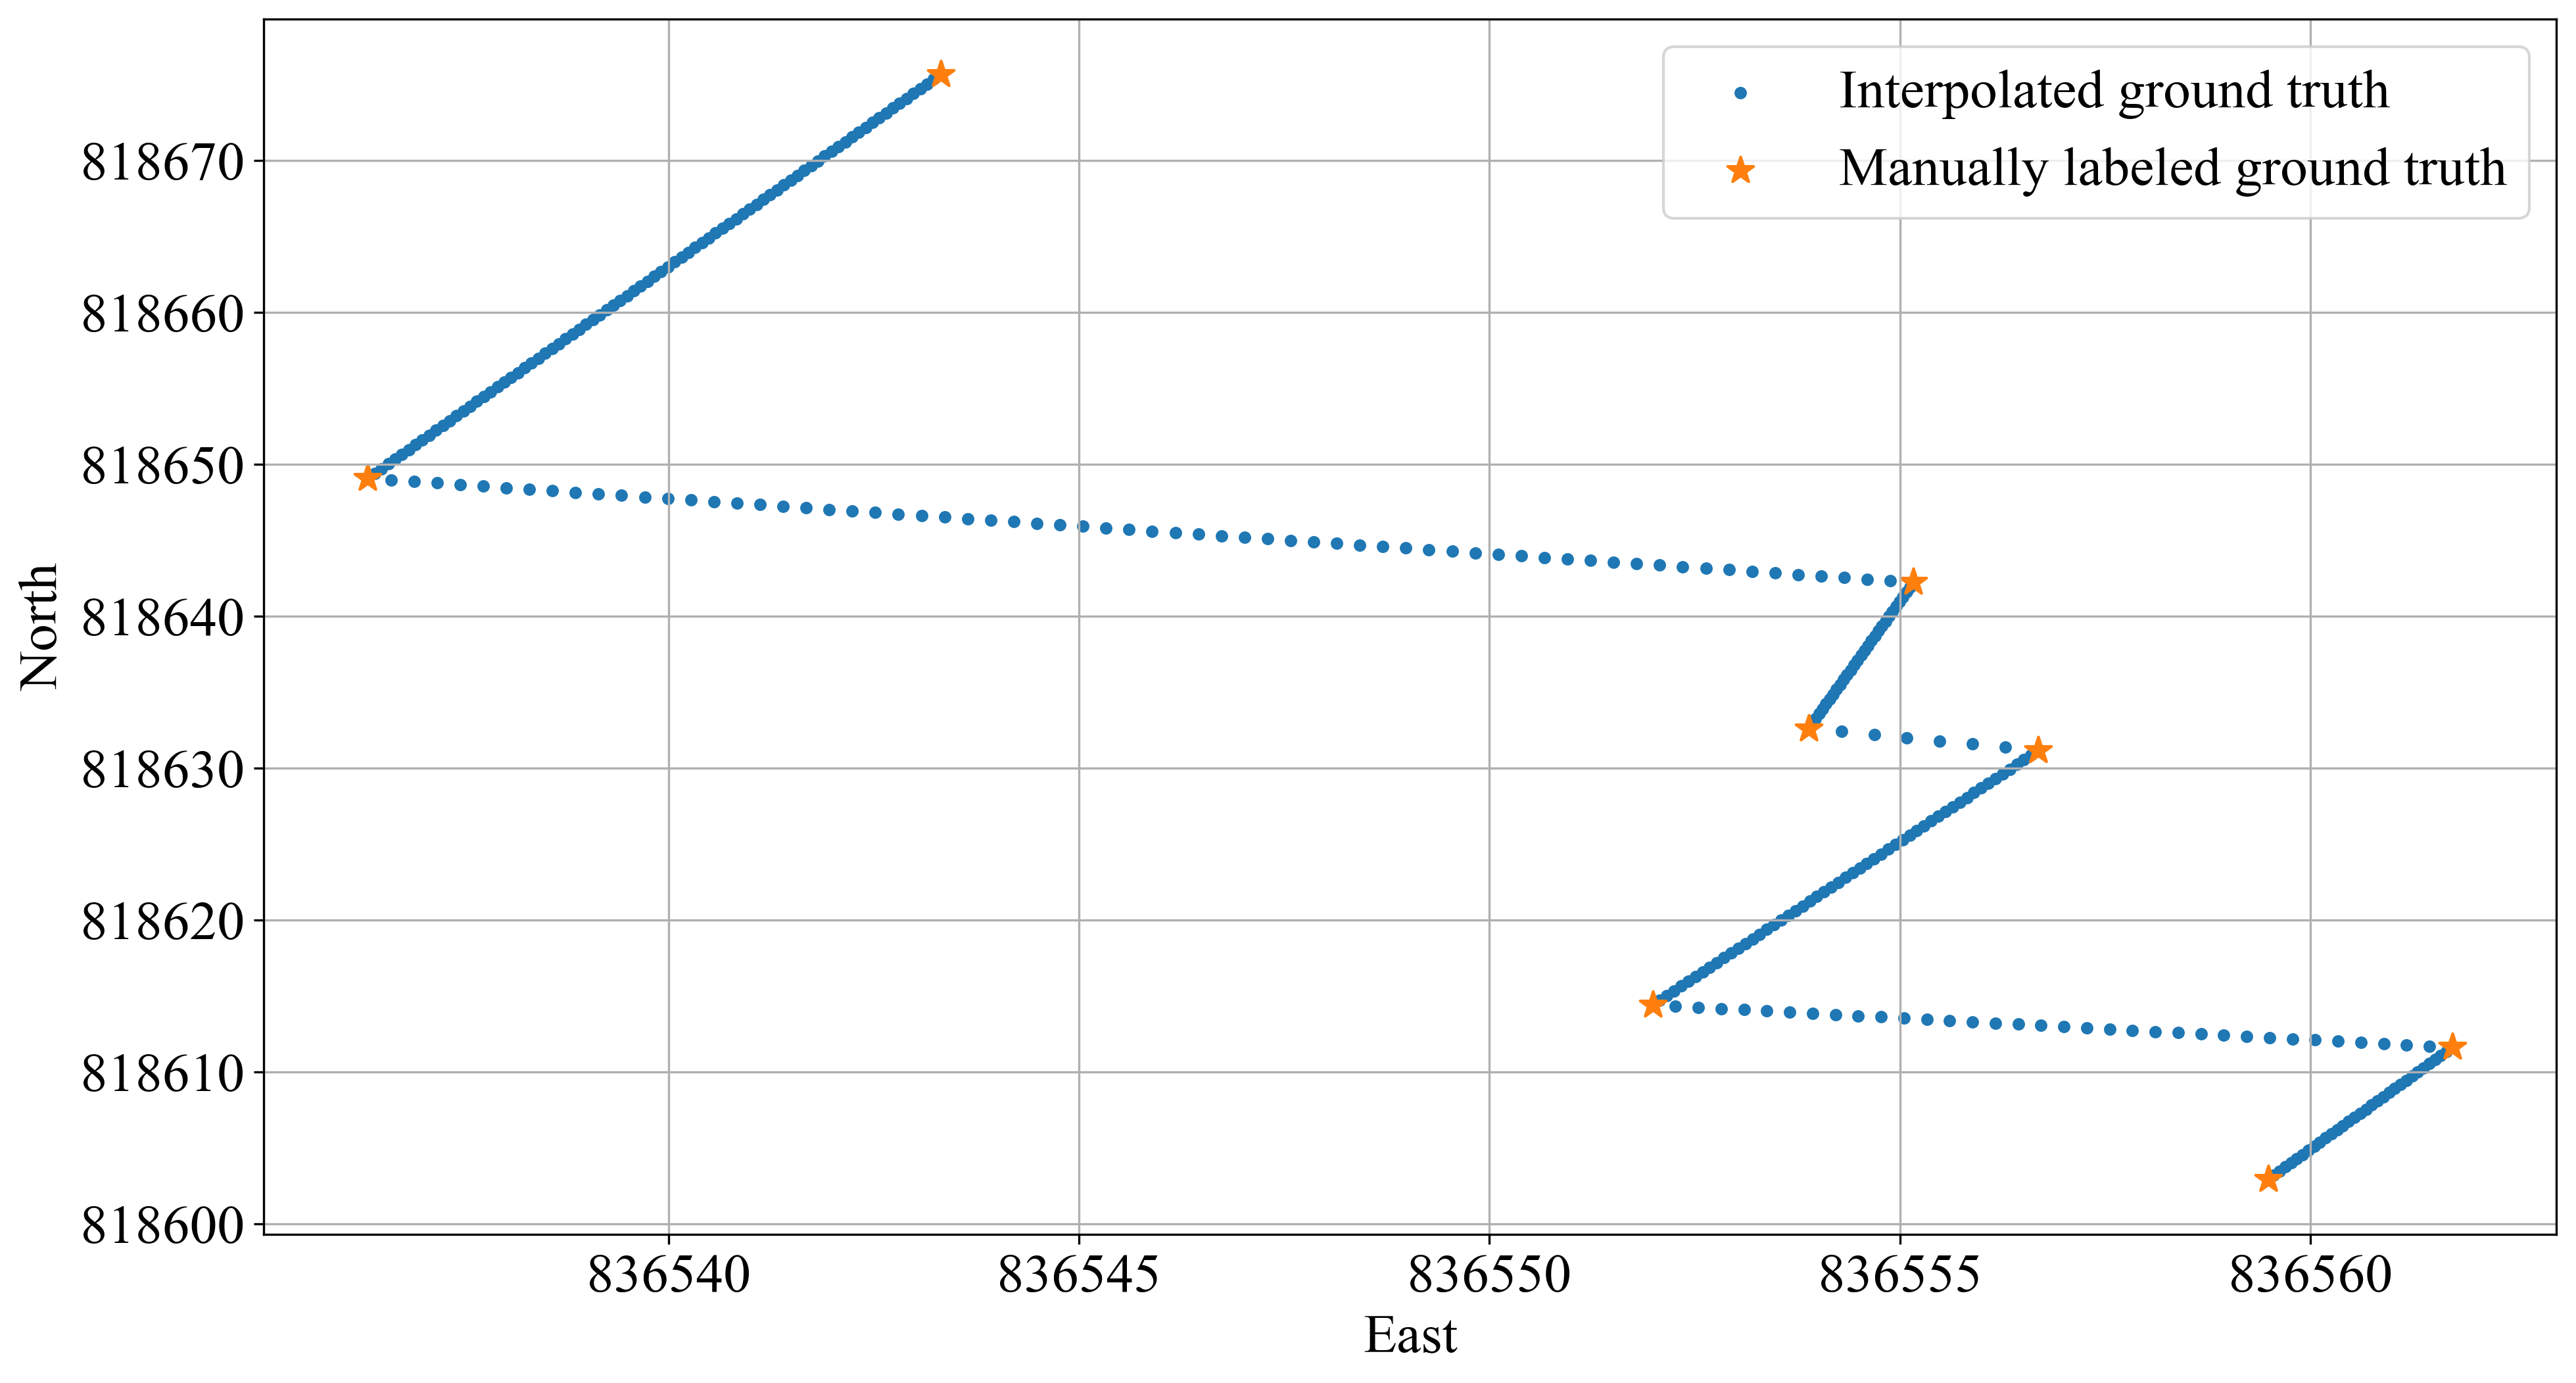

,Timestamp_(ms),Type,step,value_1,value_2,value_3,GroundTruth,value_4,value_5,turns
0,1740465065099,Initial_Location,0.0,Manual,2.207694,6.925995,0.0,836559.48563,818602.936434,0
1,1740465065101,Gyro,0.0,-0.018711451,2.226405,5.671234,0.0,0.00000,0.000000,0
2,1740465065107,Gyro,0.0,-0.012472466,2.238878,5.671234,0.0,0.00000,0.000000,0
3,1740465065113,Compass,0.0,69.41704806817991,2.238878,5.671234,0.0,0.00000,0.000000,0
4,1740465065118,Gyro,0.0,-0.013881013,2.252759,8.664886,0.0,0.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
29199,1740465231391,Compass,154.5,40.429433121180416,29.451498,326.741240,0.0,0.00000,0.000000,6
29200,1740465231393,Gyro,154.5,-0.0011019802,29.452600,326.668240,0.0,0.00000,0.000000,6
29201,1740465231394,Compass,154.5,40.3882524690039,29.452600,326.668240,0.0,0.00000,0.000000,6
29202,1740465231395,Gyro,154.5,0.017077776,29.435522,326.489870,0.0,0.00000,0.000000,6


In [10]:
import numpy as np
import pandas as pd

# Initialize an empty list to store the interpolated positions
interpolated_positions = []

# Iterate over each pair of successive ground truth locations
for i in range(len(ground_truth_location_data) - 1):
    current_row = ground_truth_location_data.iloc[i]
    next_row = ground_truth_location_data.iloc[i + 1]
    
    # Calculate the number of half steps between the current and next ground truth locations
    num_half_steps = int((next_row['step'] - current_row['step']) * 2)
    
    # Calculate the distance between the current and next ground truth locations
    distance = np.sqrt((next_row['value_4'] - current_row['value_4'])**2 + (next_row['value_5'] - current_row['value_5'])**2)
    
    # Calculate the step size for each half step
    step_size = 1*(next_row['step'] - current_row['step']) / num_half_steps
    
    # Iterate over each half step and compute the interpolated position
    for j in range(num_half_steps):
        # Calculate the step for the current half step
        half_step = current_row['step'] + (j +0) * step_size
        
        # Calculate the interpolated position using linear interpolation
        interpolated_position = {
            'Timestamp_(ms)': np.nan,
            'Type': current_row['Type'],
            'step': half_step,
            'value_1': np.nan,
            'value_2': np.nan,
            'value_3': np.nan,
            'GroundTruth': np.nan,
            'value_4': current_row['value_4'] + (half_step - current_row['step']) / (next_row['step'] - current_row['step']) * (next_row['value_4'] - current_row['value_4']),
            'value_5': current_row['value_5'] + (half_step - current_row['step']) / (next_row['step'] - current_row['step']) * (next_row['value_5'] - current_row['value_5']),
            'turns': np.nan
        }
        
        # Append the interpolated position to the list
        interpolated_positions.append(interpolated_position)

# Append the last ground truth location to the list
interpolated_positions.append(ground_truth_location_data.iloc[-1])

# Create a DataFrame from the list of interpolated positions
interpolated_positions_df = pd.DataFrame(interpolated_positions)

# Sort the DataFrame by the 'step' column
interpolated_positions_df.sort_values(by='step', inplace=True)

# Reset the index of the DataFrame
interpolated_positions_df.reset_index(drop=True, inplace=True)

# Display the interpolated positions DataFrame
interpolated_positions_df


import matplotlib.pyplot as plt

# Plot the interpolated positions in the x-y plane
plt.figure(figsize=(15, 8), dpi=300)
plt.scatter(interpolated_positions_df['value_4'], interpolated_positions_df['value_5'],marker='.',s=50, label='Interpolated ground truth')

plt.scatter(ground_truth_location_data['value_4'], ground_truth_location_data['value_5'],marker='*', s=100, label='Manually labeled ground truth')
plt.xlabel('East')
plt.ylabel('North')
plt.ticklabel_format(useOffset=False)

plt.legend()
plt.grid(True)
plt.show()

# # Set the maximum number of rows to display
# pd.set_option('display.max_rows', None)

interpolated_positions_df

# Select only the 'step' and 'value_4' (x-coordinate) and 'value_5' (y-coordinate) columns
ground_truth_positions_steps = interpolated_positions_df[['step', 'value_4', 'value_5']]

ground_truth_positions_steps = ground_truth_positions_steps.rename(columns={'value_5': 'ground_y'})
ground_truth_positions_steps = ground_truth_positions_steps.rename(columns={'value_4': 'ground_x'})




# Display the new DataFrame
ground_truth_positions_steps
data


In [11]:
# Ensure data and df_gt are sorted by timestamp
data.sort_values(by="Timestamp_(ms)", inplace=True)
df_gt.sort_values(by="Timestamp_(ms)", inplace=True)

# Use backward fill to propagate the GroundTruthHeadingComputed values
data = data.merge(df_gt[["Timestamp_(ms)", "GroundTruthHeadingComputed"]], on="Timestamp_(ms)", how="left")
data["GroundTruthHeadingComputed"] = data["GroundTruthHeadingComputed"].fillna(method="bfill")


/var/folders/3p/yvw_kpq977d7f7s19bqk_cmc0000gn/T/ipykernel_19115/2139388047.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["GroundTruthHeadingComputed"] = data["GroundTruthHeadingComputed"].fillna(method="bfill")


In [12]:


# Separate data for gyro and compass
gyro_data = data[data['Type'] == 'Gyro'].reset_index(drop=True)
compass_data = data[data['Type'] == 'Compass'].reset_index(drop=True)

# Rename 'value_1' column to 'Magnetic_Field_Magnitude' in compass data
compass_data.rename(columns={'value_1': 'Magnetic_Field_Magnitude'}, inplace=True)
compass_data.rename(columns={'value_2': 'gyroSumFromstart0'}, inplace=True)
compass_data.rename(columns={'value_3': 'compass'}, inplace=True)

gyro_data.rename(columns={'value_1': 'axisZAngle'}, inplace=True)
gyro_data.rename(columns={'value_2': 'gyroSumFromstart0'}, inplace=True)
gyro_data.rename(columns={'value_3': 'compass'}, inplace=True)


# # # Convert 'Timestamp_(ms)' to datetime format
# compass_data['Timestamp_(ms)'] = pd.to_datetime(compass_data['Timestamp_(ms)'], unit='ms')

# # # Convert datetime to seconds
# compass_data['Time_seconds'] = compass_data['Timestamp_(ms)'].dt.second + compass_data['Timestamp_(ms)'].dt.minute * 60 + compass_data['Timestamp_(ms)'].dt.hour * 3600
# # Find the minimum timestamp and subtract it from all timestamps to start from 0 seconds
# min_timestamp = compass_data['Timestamp_(ms)'].min()
# compass_data['Time_seconds'] = (compass_data['Timestamp_(ms)'] - min_timestamp).dt.total_seconds()


first_ground_truth = initial_location_data['GroundTruth'][0]

# Calculate the value for the new column
compass_data['GyroStartByGroundTruth'] = first_ground_truth + compass_data['gyroSumFromstart0']-compass_data['gyroSumFromstart0'][0]

compass_data['GyroStartByGroundTruth']=(compass_data['GyroStartByGroundTruth'] + 360) % 360


gyro_data['GyroStartByGroundTruth'] = first_ground_truth + gyro_data['gyroSumFromstart0']-gyro_data['gyroSumFromstart0'][0]

gyro_data['GyroStartByGroundTruth']=(gyro_data['GyroStartByGroundTruth'] + 360) % 360

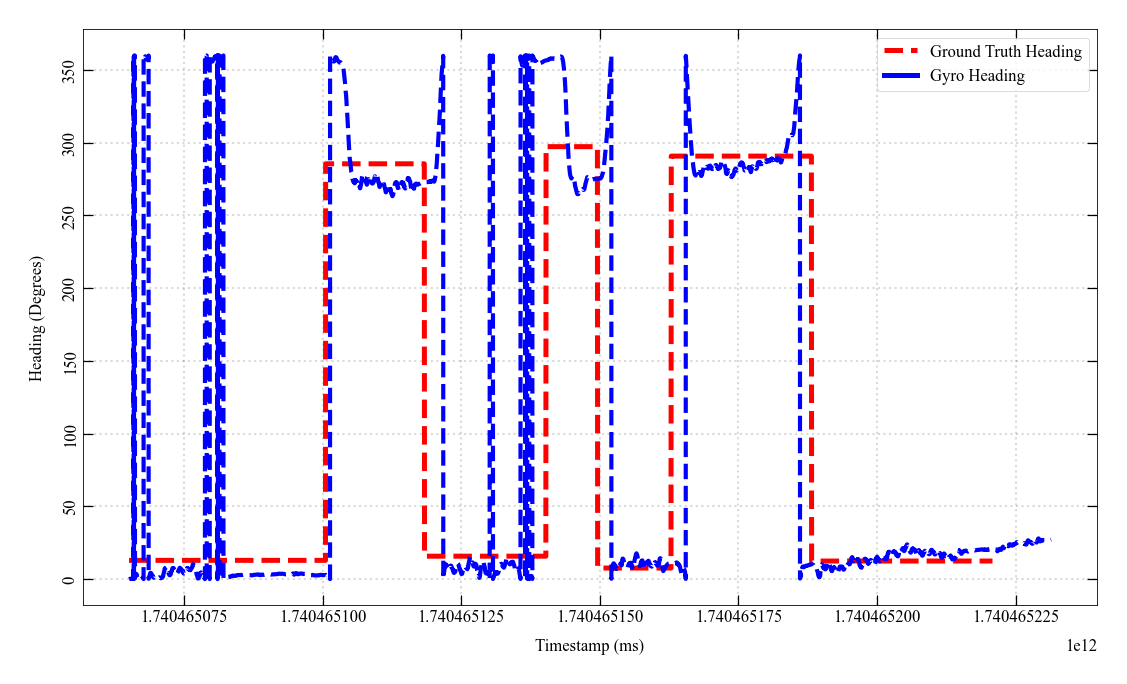

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
plt.rcParams['font.family'] = 'Times New Roman'

# Set plot parameters for IEEE format
fontSizeAll = 4
plt.rcParams.update({
    'xtick.major.pad': '1',
    'ytick.major.pad': '1',
    'legend.fontsize': fontSizeAll,
    'legend.handlelength': 2,
    'font.size': fontSizeAll,
    'axes.linewidth': 0.2,
    'patch.linewidth': 0.2,
    'font.family': "Times New Roman"
})

# Create figure for IEEE column width
fig, ax = plt.subplots(figsize=(3.45, 2), dpi=300)
plt.subplots_adjust(left=0.01, bottom=0.03, right=0.99, top=0.99, wspace=0.00, hspace=0.0)

# Ensure gyro_data is sorted by timestamp
# gyro_data = data[data["Type"] == "Gyro"].sort_values(by="Timestamp_(ms)")

# Plot GroundTruthHeadingComputed
plt.plot(gyro_data["Timestamp_(ms)"], gyro_data["GroundTruthHeadingComputed"], 
         color='red', linestyle='--', linewidth=1.2, label='GroundTruth Heading Computed')
plt.plot(gyro_data["Timestamp_(ms)"], gyro_data["GyroStartByGroundTruth"], 
         color='blue', linestyle='--', linewidth=1, label='Gyro Heading')


# Plot GyroStartByGroundTruth (assuming it's stored in 'value_1' for Gyro type rows)
# plt.plot(gyro_data["Timestamp_(ms)"], gyro_data["value_1"], 
#          color='red', linestyle='-', linewidth=1.2, label='Gyro Start By GroundTruth')

# Axis formatting
# ax.yaxis.set_major_locator(MultipleLocator(40))  # Y-axis major tick interval: 40 degrees
# ax.yaxis.set_minor_locator(MultipleLocator(20))  # Y-axis minor tick interval: 20 degrees
# ax.xaxis.set_major_locator(MultipleLocator(5000))  # X-axis major tick interval: 5000ms
# ax.xaxis.set_minor_locator(MultipleLocator(2500))  # X-axis minor tick interval: 2500ms

plt.xlabel("Timestamp (ms)", labelpad=3)
plt.ylabel("Heading (Degrees)", labelpad=4)

# Rotate y-tick labels
plt.yticks(rotation=90, va="center")

# Ticks and grid
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', 
                which='major', grid_color='blue', width=0.3, length=2.5)
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', 
                which='minor', grid_color='blue', width=0.15, length=1)

# Custom Legend
legend_elements = [
    Line2D([0], [0], color='red', linestyle='--', linewidth=1.2, label='Ground Truth Heading'),
    Line2D([0], [0], color='blue', linestyle='-', linewidth=1.2, label='Gyro Heading')
]

plt.legend(handles=legend_elements, loc='best')

# Grid
ax.ticklabel_format(useOffset=False)
plt.grid(linestyle=':', linewidth=0.5, alpha=0.15, color='k')

# Show plot
plt.show()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
walked_distance = 0
current_position_gt = initial_position
current_position_compass = initial_position
current_position_gyro = initial_position

# Calculate positions of all steps
positions_compass = []
positions_gt = []
positions_gyro = []
step_numbers = []  # List to track step numbers

# Initialize variables for tracking the previous step number and heading
prev_step = compass_data['step'][0]

for i in range(1, len(compass_data)):
    # Calculate change in step number
    change_in_step = compass_data['step'][i] - prev_step

    # If the step number has changed, compute the new position
    if change_in_step != 0:
        # Calculate walked distance for this step
        change_in_distance = change_in_step * 0.66
        
        # Calculate new positions for each method
        new_x_gt = current_position_gt[0] + change_in_distance * np.sin(np.radians(compass_data['GroundTruth'][i]))
        new_y_gt = current_position_gt[1] + change_in_distance * np.cos(np.radians(compass_data['GroundTruth'][i]))

        new_x_compass = current_position_compass[0] + change_in_distance * np.sin(np.radians(compass_data['compass'][i]))
        new_y_compass = current_position_compass[1] + change_in_distance * np.cos(np.radians(compass_data['compass'][i]))

        new_x_gyro = current_position_gyro[0] + change_in_distance * np.sin(np.radians(compass_data['GyroStartByGroundTruth'][i]))
        new_y_gyro = current_position_gyro[1] + change_in_distance * np.cos(np.radians(compass_data['GyroStartByGroundTruth'][i]))

        # Update current positions
        current_position_gt = (new_x_gt, new_y_gt)
        current_position_compass = (new_x_compass, new_y_compass)
        current_position_gyro = (new_x_gyro, new_y_gyro)

        # Append new positions and step numbers
        positions_gt.append(current_position_gt)
        positions_compass.append(current_position_compass)
        positions_gyro.append(current_position_gyro)
        step_numbers.append(compass_data['step'][i])  # Store step number

        # Update previous step number
        prev_step = compass_data['step'][i]
        
# Extract x and y coordinates from positions
x_positions_compass = [position[0] for position in positions_compass]
y_positions_compass = [position[1] for position in positions_compass]

x_positions_gt = [position[0] for position in positions_gt]
y_positions_gt = [position[1] for position in positions_gt]

x_positions_gyro = [position[0] for position in positions_gyro]
y_positions_gyro = [position[1] for position in positions_gyro]
# Create DataFrames with step numbers
df_positions_compass = pd.DataFrame(positions_compass, columns=['Compass_X', 'Compass_Y'])
df_positions_gt = pd.DataFrame(positions_gt, columns=['GroundTruth_X', 'GroundTruth_Y'])
df_positions_gyro = pd.DataFrame(positions_gyro, columns=['Gyro_X', 'Gyro_Y'])

# Add step number to each DataFrame
df_positions_compass['Step'] = step_numbers
df_positions_gt['Step'] = step_numbers
df_positions_gyro['Step'] = step_numbers



In [15]:
df_positions_gyro

,Gyro_X,Gyro_Y,Step
0,836559.473375,818603.266206,0.5
1,836559.489833,818603.595796,1.0
2,836559.529230,818603.923436,1.5
3,836559.567772,818604.251177,2.0
4,836559.591152,818604.580348,2.5
...,...,...,...
304,836535.970438,818673.188319,152.5
305,836536.052576,818673.507934,153.0
306,836536.133779,818673.827787,153.5
307,836536.219915,818674.146347,154.0


In [16]:
# Merge df_positions_gt with compass_data based on the step number
# Ensure the step column is of the same type in both DataFrames
df_positions_gt['Step'] = df_positions_gt['Step'].astype(float)
compass_data['step'] = compass_data['step'].astype(float)

# Perform the merge
compass_data_merged = compass_data.merge(df_positions_gt, left_on='step', right_on='Step', how='left')

# Drop the redundant 'Step' column from df_positions_gt
compass_data_merged.drop(columns=['Step'], inplace=True)

# Ensure the step column is of the same type in both DataFrames
df_positions_compass['Step'] = df_positions_compass['Step'].astype(float)
compass_data_merged['step'] = compass_data_merged['step'].astype(float)

# Perform the merge
compass_data_final = compass_data_merged.merge(df_positions_compass, left_on='step', right_on='Step', how='left')

# Drop the redundant 'Step' column from df_positions_compass
compass_data_final.drop(columns=['Step'], inplace=True)



In [17]:
# Merge df_positions_gt with compass_data based on the step number
# Ensure the step column is of the same type in both DataFrames
df_positions_gt['Step'] = df_positions_gt['Step'].astype(float)
gyro_data['step'] = gyro_data['step'].astype(float)

# Perform the merge
gyro_data_merged = gyro_data.merge(df_positions_gt, left_on='step', right_on='Step', how='left')

# Drop the redundant 'Step' column from df_positions_gt
gyro_data_merged.drop(columns=['Step'], inplace=True)

# Ensure the step column is of the same type in both DataFrames
df_positions_gyro['Step'] = df_positions_gyro['Step'].astype(float)
gyro_data_merged['step'] = gyro_data_merged['step'].astype(float)

# Perform the merge
gyro_data_final = gyro_data_merged.merge(df_positions_gyro, left_on='step', right_on='Step', how='left')

# Drop the redundant 'Step' column from df_positions_compass
gyro_data_final.drop(columns=['Step'], inplace=True)



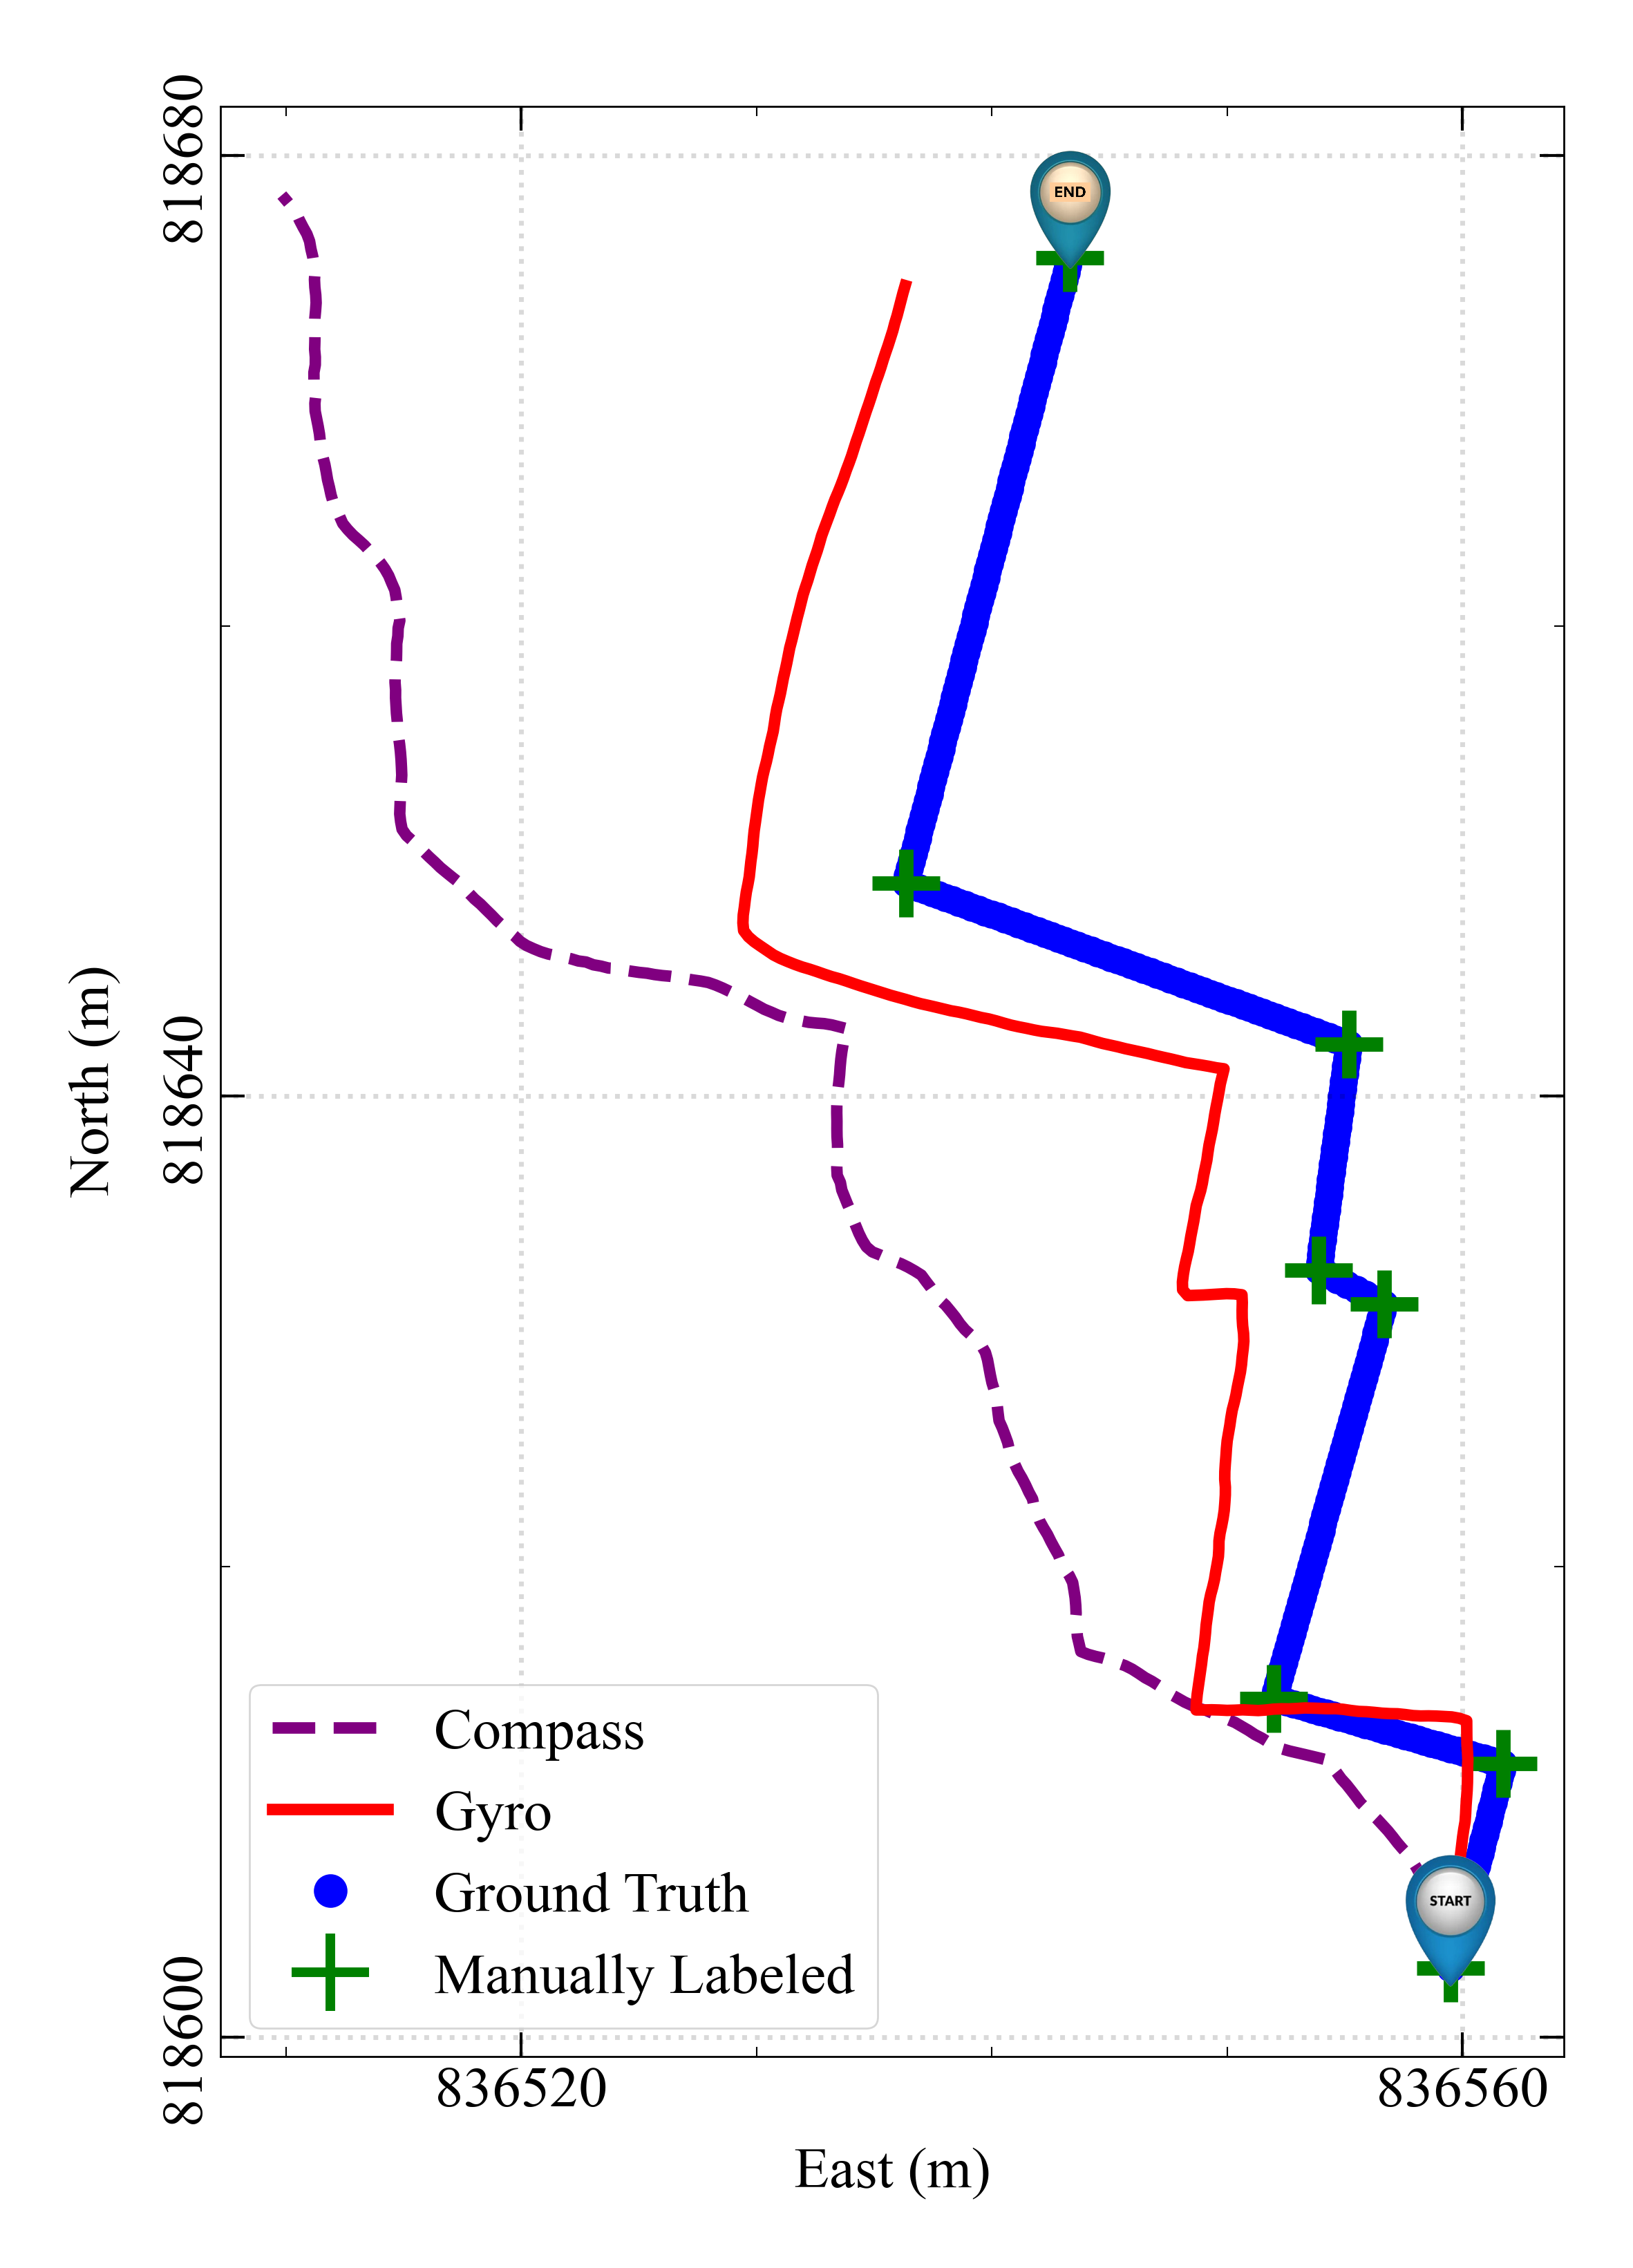

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Set plot parameters for IEEE format
fontSizeAll = 6
plt.rcParams.update({
    'xtick.major.pad': '1',
    'ytick.major.pad': '1',
    'legend.fontsize': fontSizeAll,
    'legend.handlelength': 2,
    'font.size': fontSizeAll,
    'axes.linewidth': 0.2,
    'patch.linewidth': 0.2,
    'font.family': "Times New Roman"
})

# Load custom markers (replace with correct file paths if necessary)
start_img = mpimg.imread("start.png")
end_img = mpimg.imread("enda.png")

# Function to add image marker at specific coordinates
def add_marker(ax, img, x, y, zoom=0.1):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, zorder=100)
    ax.add_artist(ab)

# Create figure for IEEE column width
fig, ax = plt.subplots(figsize=(3.45, 2.94), dpi=1000)
plt.subplots_adjust(left=0.01, bottom=0.03, right=0.99, top=0.99, wspace=0.00, hspace=0.0)

# Plot Tracks (Swapping axes: East on X, North on Y)
plt.plot(x_positions_compass, y_positions_compass, color='purple', linestyle='--', linewidth=1.2, label='Compass')
plt.plot(x_positions_gyro, y_positions_gyro, color='red', linestyle='-', linewidth=1.2, label='Gyro')

# Ground truth positions 
plt.scatter(interpolated_positions_df['value_4'], interpolated_positions_df['value_5'], 
            c='blue', marker='.', s=30, label='Ground Truth')

# Manually labeled points 
plt.scatter(ground_truth_location_data['value_4'], ground_truth_location_data['value_5'], 
            marker='+', s=50, c='green', label='Manually Labeled')

# Add start and end markers on Ground Truth positions
start_x, start_y = ground_truth_location_data['value_4'].iloc[0], ground_truth_location_data['value_5'].iloc[0]+2
end_x, end_y = ground_truth_location_data['value_4'].iloc[-1], ground_truth_location_data['value_5'].iloc[-1]+2

add_marker(ax, start_img, start_x, start_y, zoom=0.05)
add_marker(ax, end_img, end_x, end_y, zoom=0.013)

# Axis formatting
ax.yaxis.set_major_locator(MultipleLocator(40))  # Y-axis major tick interval: 40m
ax.yaxis.set_minor_locator(MultipleLocator(20))  # Y-axis minor tick interval: 20m
ax.xaxis.set_major_locator(MultipleLocator(40))  # X-axis major tick interval: 40m
ax.xaxis.set_minor_locator(MultipleLocator(10))  # X-axis minor tick interval: 10m

plt.axis('scaled')

# Labels (Swapped: East on X-axis, North on Y-axis)
plt.xlabel('East (m)', labelpad=3)
plt.ylabel('North (m)', labelpad=4)

# Rotate y-tick labels
plt.yticks(rotation=90, va="center")

# Ticks and grid
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', 
                which='major', grid_color='blue', width=0.3, length=2.5)
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', 
                which='minor', grid_color='blue', width=0.15, length=1)

# Custom Legend
legend_elements = [
    Line2D([0], [0], color='purple', linestyle='--', linewidth=1.2, label='Compass'),
    Line2D([0], [0], color='red', linestyle='-', linewidth=1.2, label='Gyro'),
    Line2D([0], [0], marker='.', color='blue', markersize=5, linestyle='None', label='Ground Truth'),
    Line2D([0], [0], marker='+', color='green', markersize=8, linestyle='None', label='Manually Labeled')
]

plt.legend(handles=legend_elements, loc='best')

# Grid
ax.ticklabel_format(useOffset=False)
plt.grid(linestyle=':', linewidth=0.5, alpha=0.15, color='k')

# Show plot
plt.show()


In [19]:
# Drop duplicate steps
unique_steps_data = compass_data.drop_duplicates(subset=['step']).reset_index(drop=True)

# Concatenate positions DataFrames with unique_steps_data
unique_steps_data = pd.concat([unique_steps_data, df_positions_compass, df_positions_gt, df_positions_gyro], axis=1)

# Display the updated DataFrame
unique_steps_data

# Select only the 'step' and 'value_4' (x-coordinate) and 'value_5' (y-coordinate) columns
compass_gyro_positions_steps = unique_steps_data[['step', 'Gyro_X', 'Gyro_Y', 'Compass_X', 'Compass_Y']]


# Merge the two DataFrames based on the 'step' column
comapre = compass_gyro_positions_steps.merge(ground_truth_positions_steps, on='step')

# Display the combined DataFrame
comapre


,step,Gyro_X,Gyro_Y,Compass_X,Compass_Y,ground_x,ground_y
0,0.0,836559.473375,818603.266206,836559.520406,818603.264597,836559.485630,818602.936434
1,0.5,836559.489833,818603.595796,836559.507909,818603.594360,836559.555798,818603.208002
2,1.0,836559.529230,818603.923436,836559.496336,818603.924157,836559.625965,818603.479569
3,1.5,836559.567772,818604.251177,836559.453664,818604.251386,836559.696132,818603.751137
4,2.0,836559.591152,818604.580348,836559.364161,818604.569017,836559.766299,818604.022705
...,...,...,...,...,...,...,...
305,152.5,836536.052576,818673.507934,836510.435612,818677.538776,836542.984284,818674.385386
306,153.0,836536.133779,818673.827787,836510.245310,818677.808378,836543.067354,818674.701882
307,153.5,836536.219915,818674.146347,836510.029806,818678.058294,836543.150424,818675.018377
308,154.0,836536.311976,818674.463246,836509.816381,818678.309987,836543.233494,818675.334873


In [20]:

# Add error columns to unique_steps_data for gyro
comapre['Gyro_Error_X'] = np.abs(comapre['Gyro_X'] - comapre['ground_x'])
comapre['Gyro_Error_Y'] = np.abs(comapre['Gyro_Y'] - comapre['ground_y'])

# Calculate the distance error between gyro and ground truth for each step
gyro_distance_error = np.sqrt((comapre['Gyro_Error_X'])**2 + (comapre['Gyro_Error_Y'])**2)

# Add distance error column to unique_steps_data for gyro
comapre['Gyro_Distance_Error'] = gyro_distance_error



# Add error columns to unique_steps_data for compass
comapre['Compass_Error_X'] = np.abs(comapre['Compass_X'] - comapre['ground_x'])
comapre['Compass_Error_Y'] = np.abs(comapre['Compass_Y'] - comapre['ground_y'])

# Calculate the distance error between compass and ground truth for each step
compass_distance_error = np.sqrt((comapre['Compass_Error_X'])**2 + (comapre['Compass_Error_Y'])**2)

# Add distance error column to unique_steps_data for compass
comapre['Compass_Distance_Error'] = compass_distance_error

# Display the updated DataFrame
comapre
comapre['Walked_distance']=comapre['step']*0.66
comapre

,step,Gyro_X,Gyro_Y,Compass_X,Compass_Y,ground_x,ground_y,Gyro_Error_X,Gyro_Error_Y,Gyro_Distance_Error,Compass_Error_X,Compass_Error_Y,Compass_Distance_Error,Walked_distance
0,0.0,836559.473375,818603.266206,836559.520406,818603.264597,836559.485630,818602.936434,0.012255,0.329772,0.330000,0.034775,0.328163,0.330000,0.00
1,0.5,836559.489833,818603.595796,836559.507909,818603.594360,836559.555798,818603.208002,0.065964,0.387794,0.393364,0.047889,0.386358,0.389315,0.33
2,1.0,836559.529230,818603.923436,836559.496336,818603.924157,836559.625965,818603.479569,0.096735,0.443866,0.454285,0.129629,0.444587,0.463100,0.66
3,1.5,836559.567772,818604.251177,836559.453664,818604.251386,836559.696132,818603.751137,0.128360,0.500040,0.516252,0.242468,0.500249,0.555914,0.99
4,2.0,836559.591152,818604.580348,836559.364161,818604.569017,836559.766299,818604.022705,0.175147,0.557643,0.584502,0.402138,0.546312,0.678360,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,152.5,836536.052576,818673.507934,836510.435612,818677.538776,836542.984284,818674.385386,6.931708,0.877453,6.987024,32.548672,3.153390,32.701069,100.65
306,153.0,836536.133779,818673.827787,836510.245310,818677.808378,836543.067354,818674.701882,6.933575,0.874095,6.988455,32.822044,3.106496,32.968726,100.98
307,153.5,836536.219915,818674.146347,836510.029806,818678.058294,836543.150424,818675.018377,6.930509,0.872030,6.985155,33.120619,3.039916,33.259833,101.31
308,154.0,836536.311976,818674.463246,836509.816381,818678.309987,836543.233494,818675.334873,6.921518,0.871627,6.976184,33.417114,2.975114,33.549289,101.64


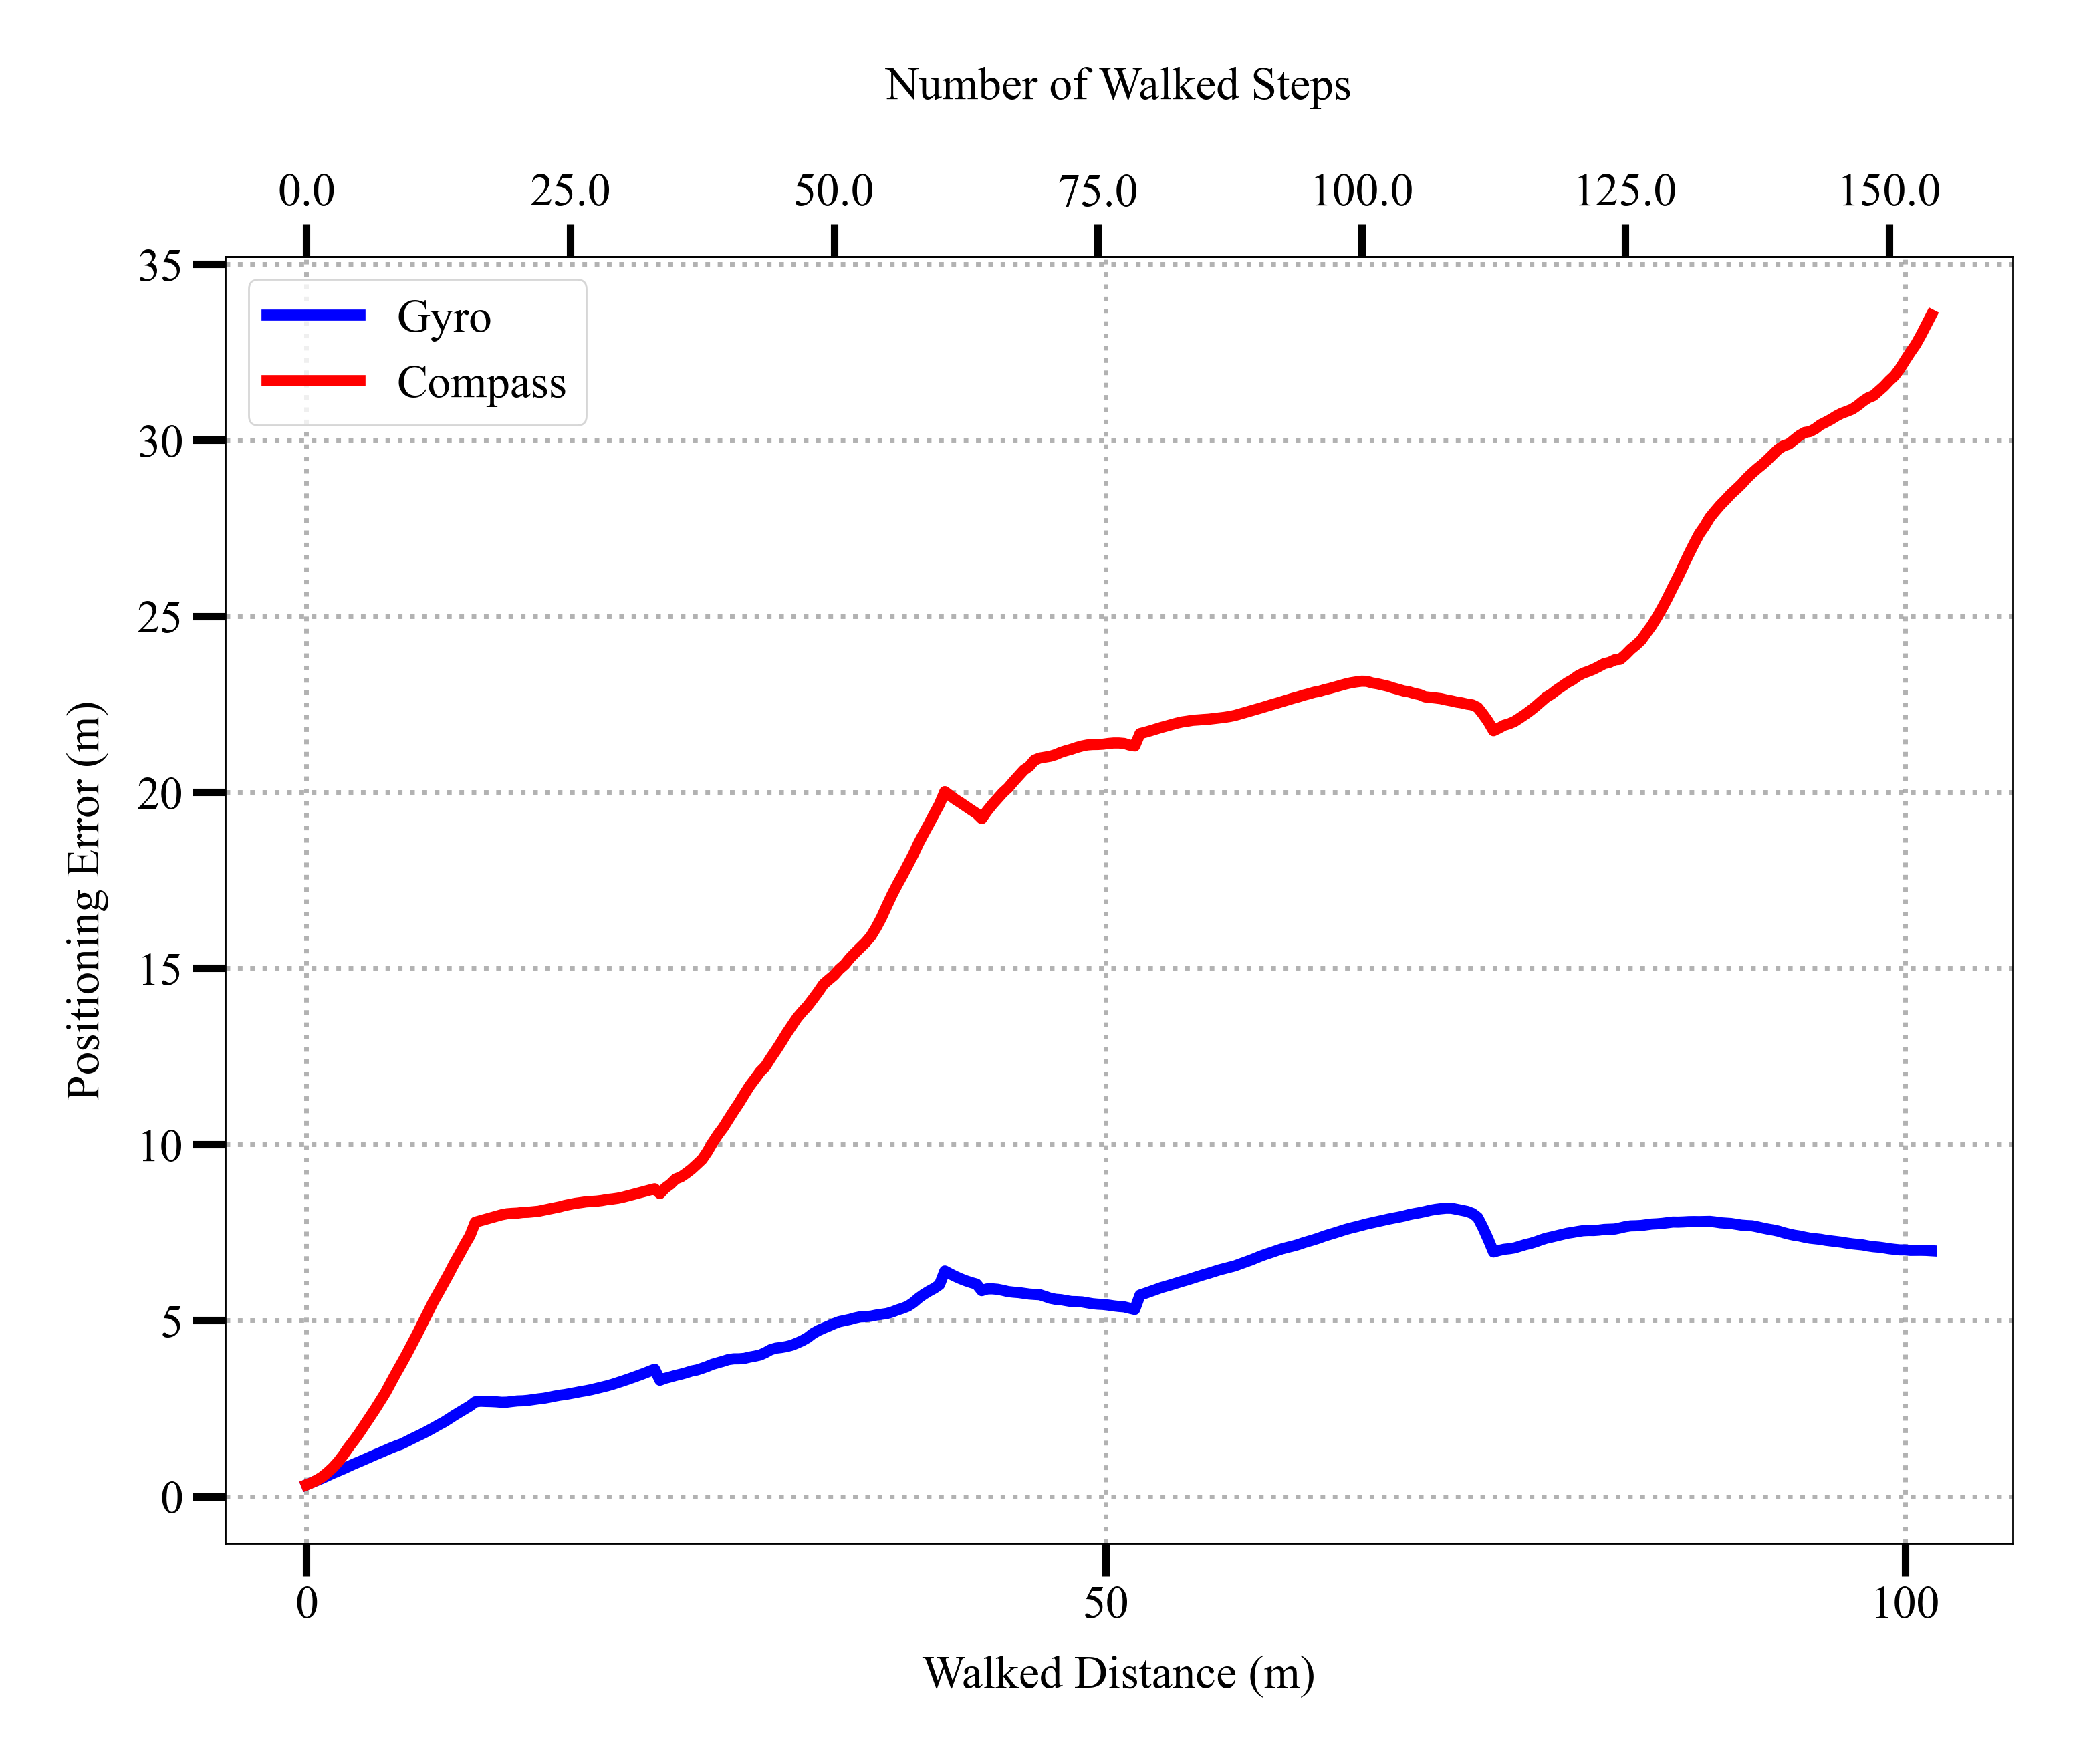

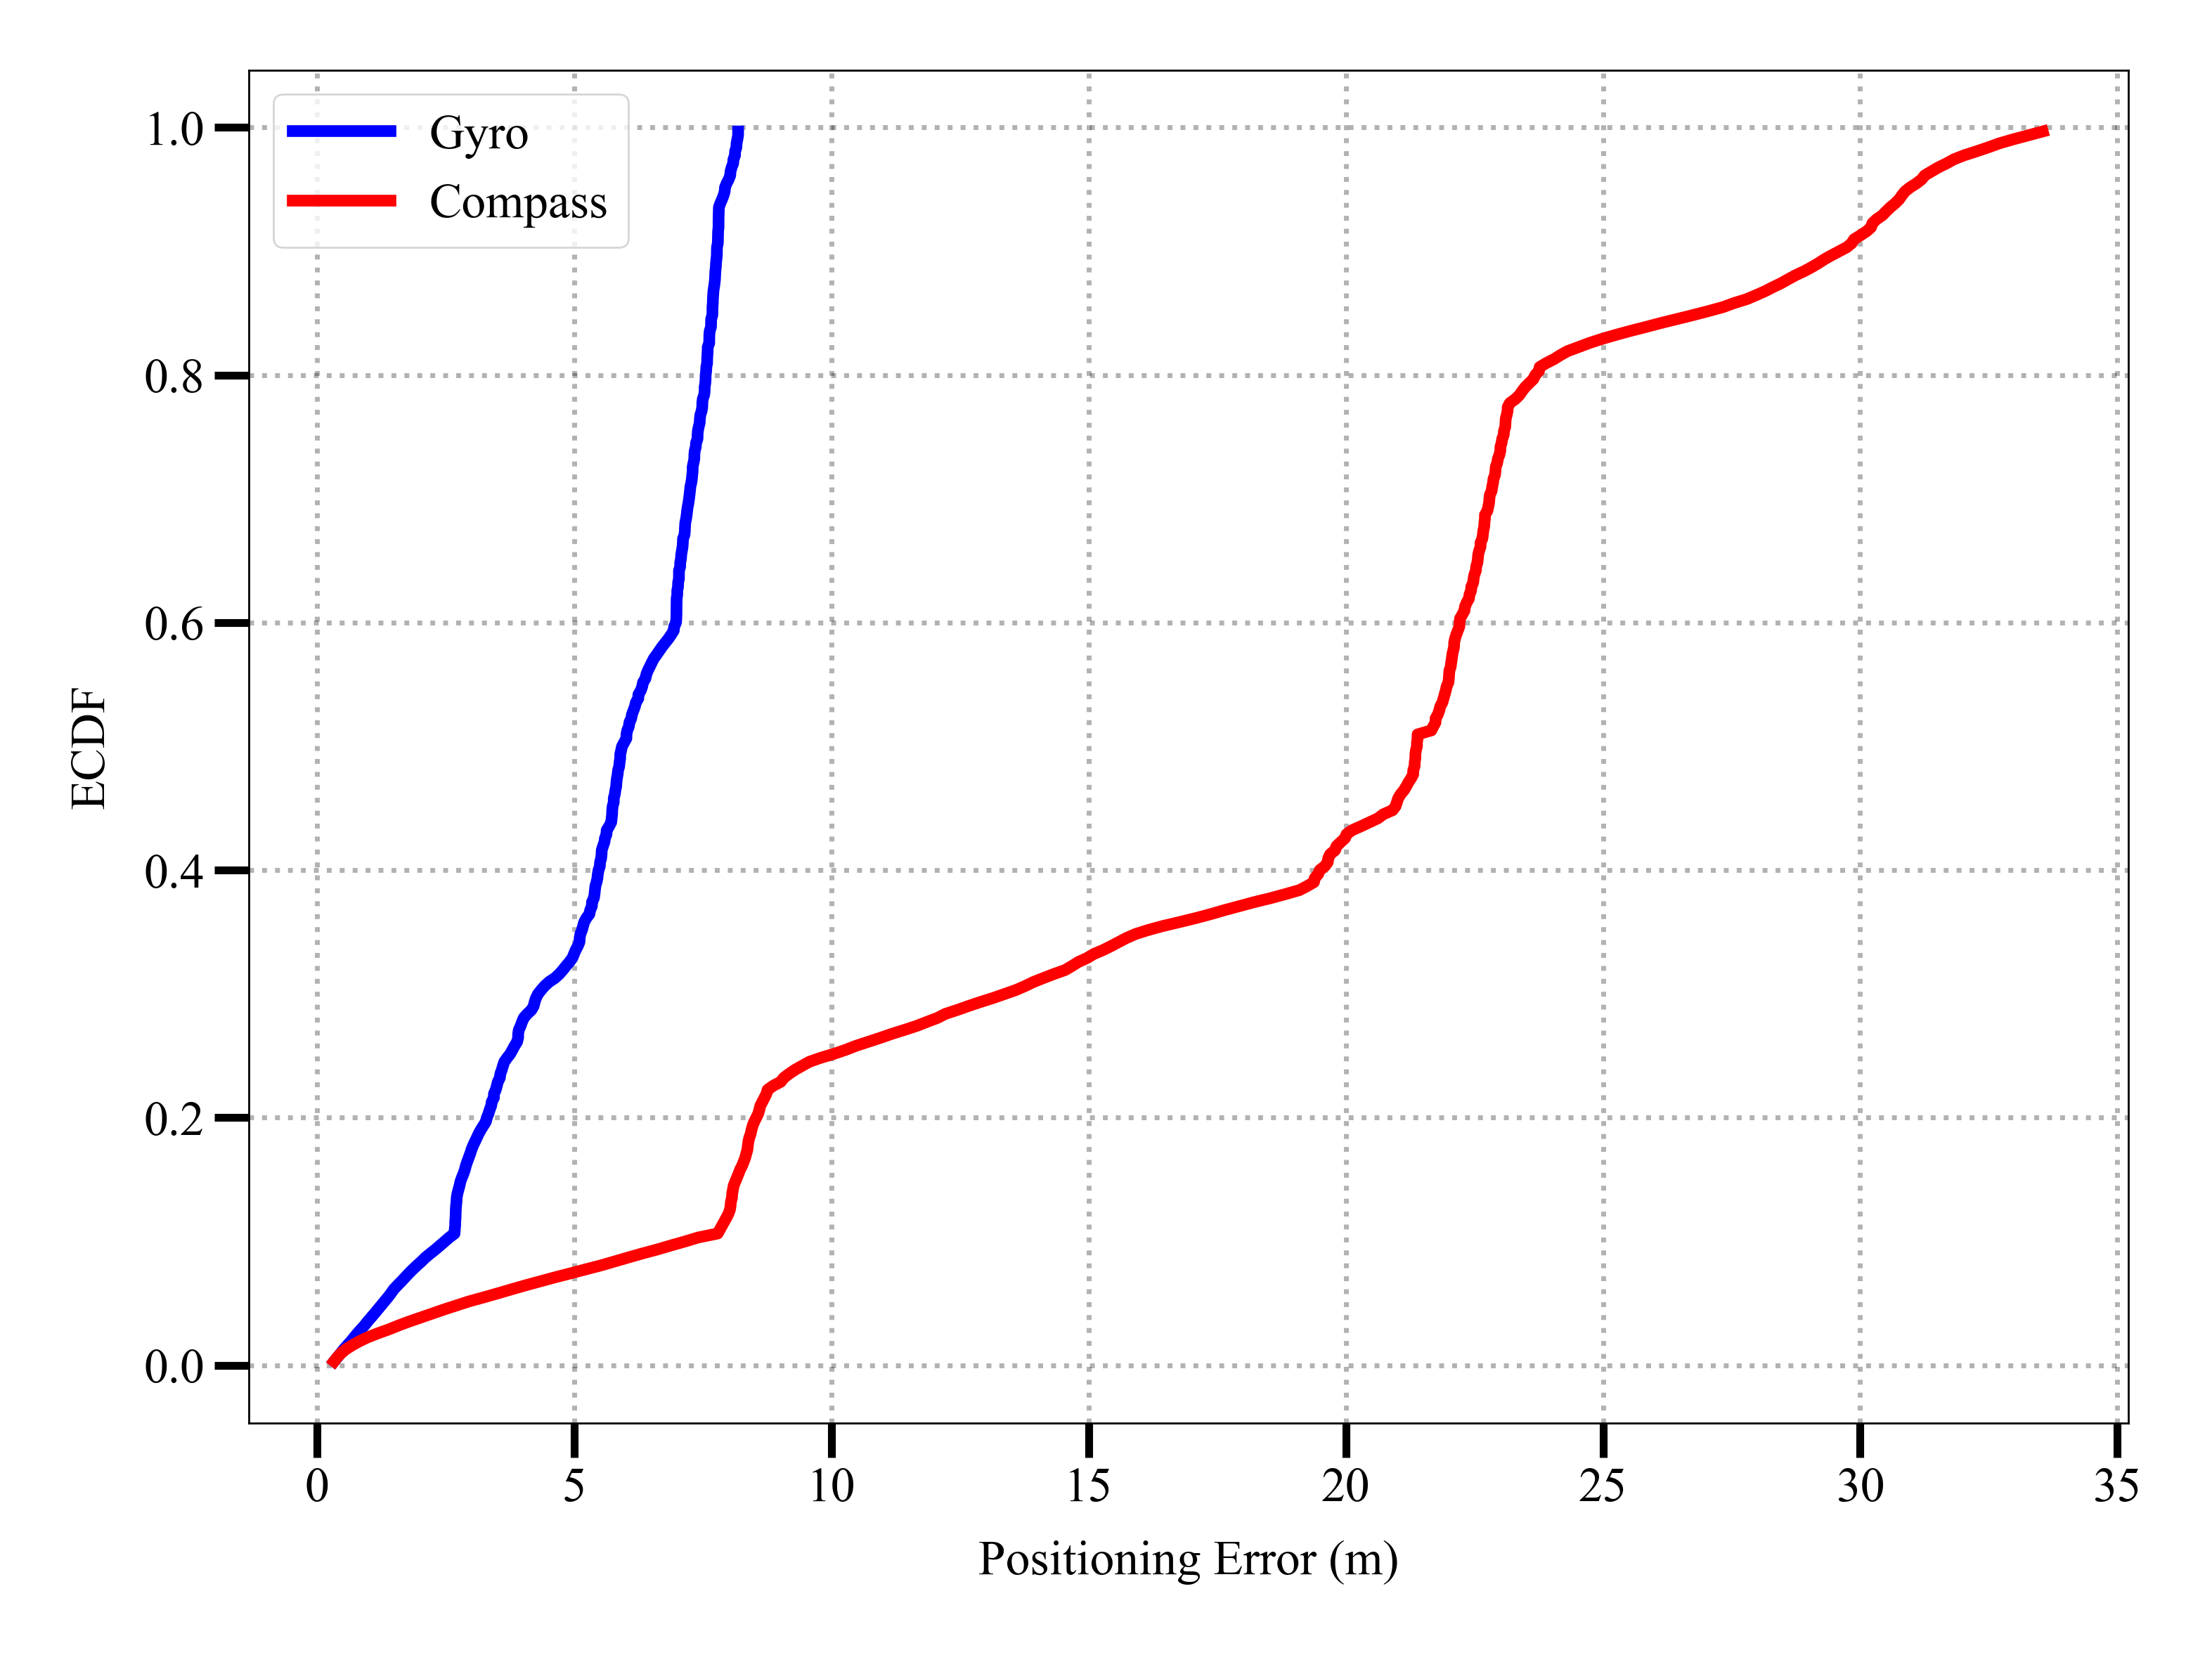

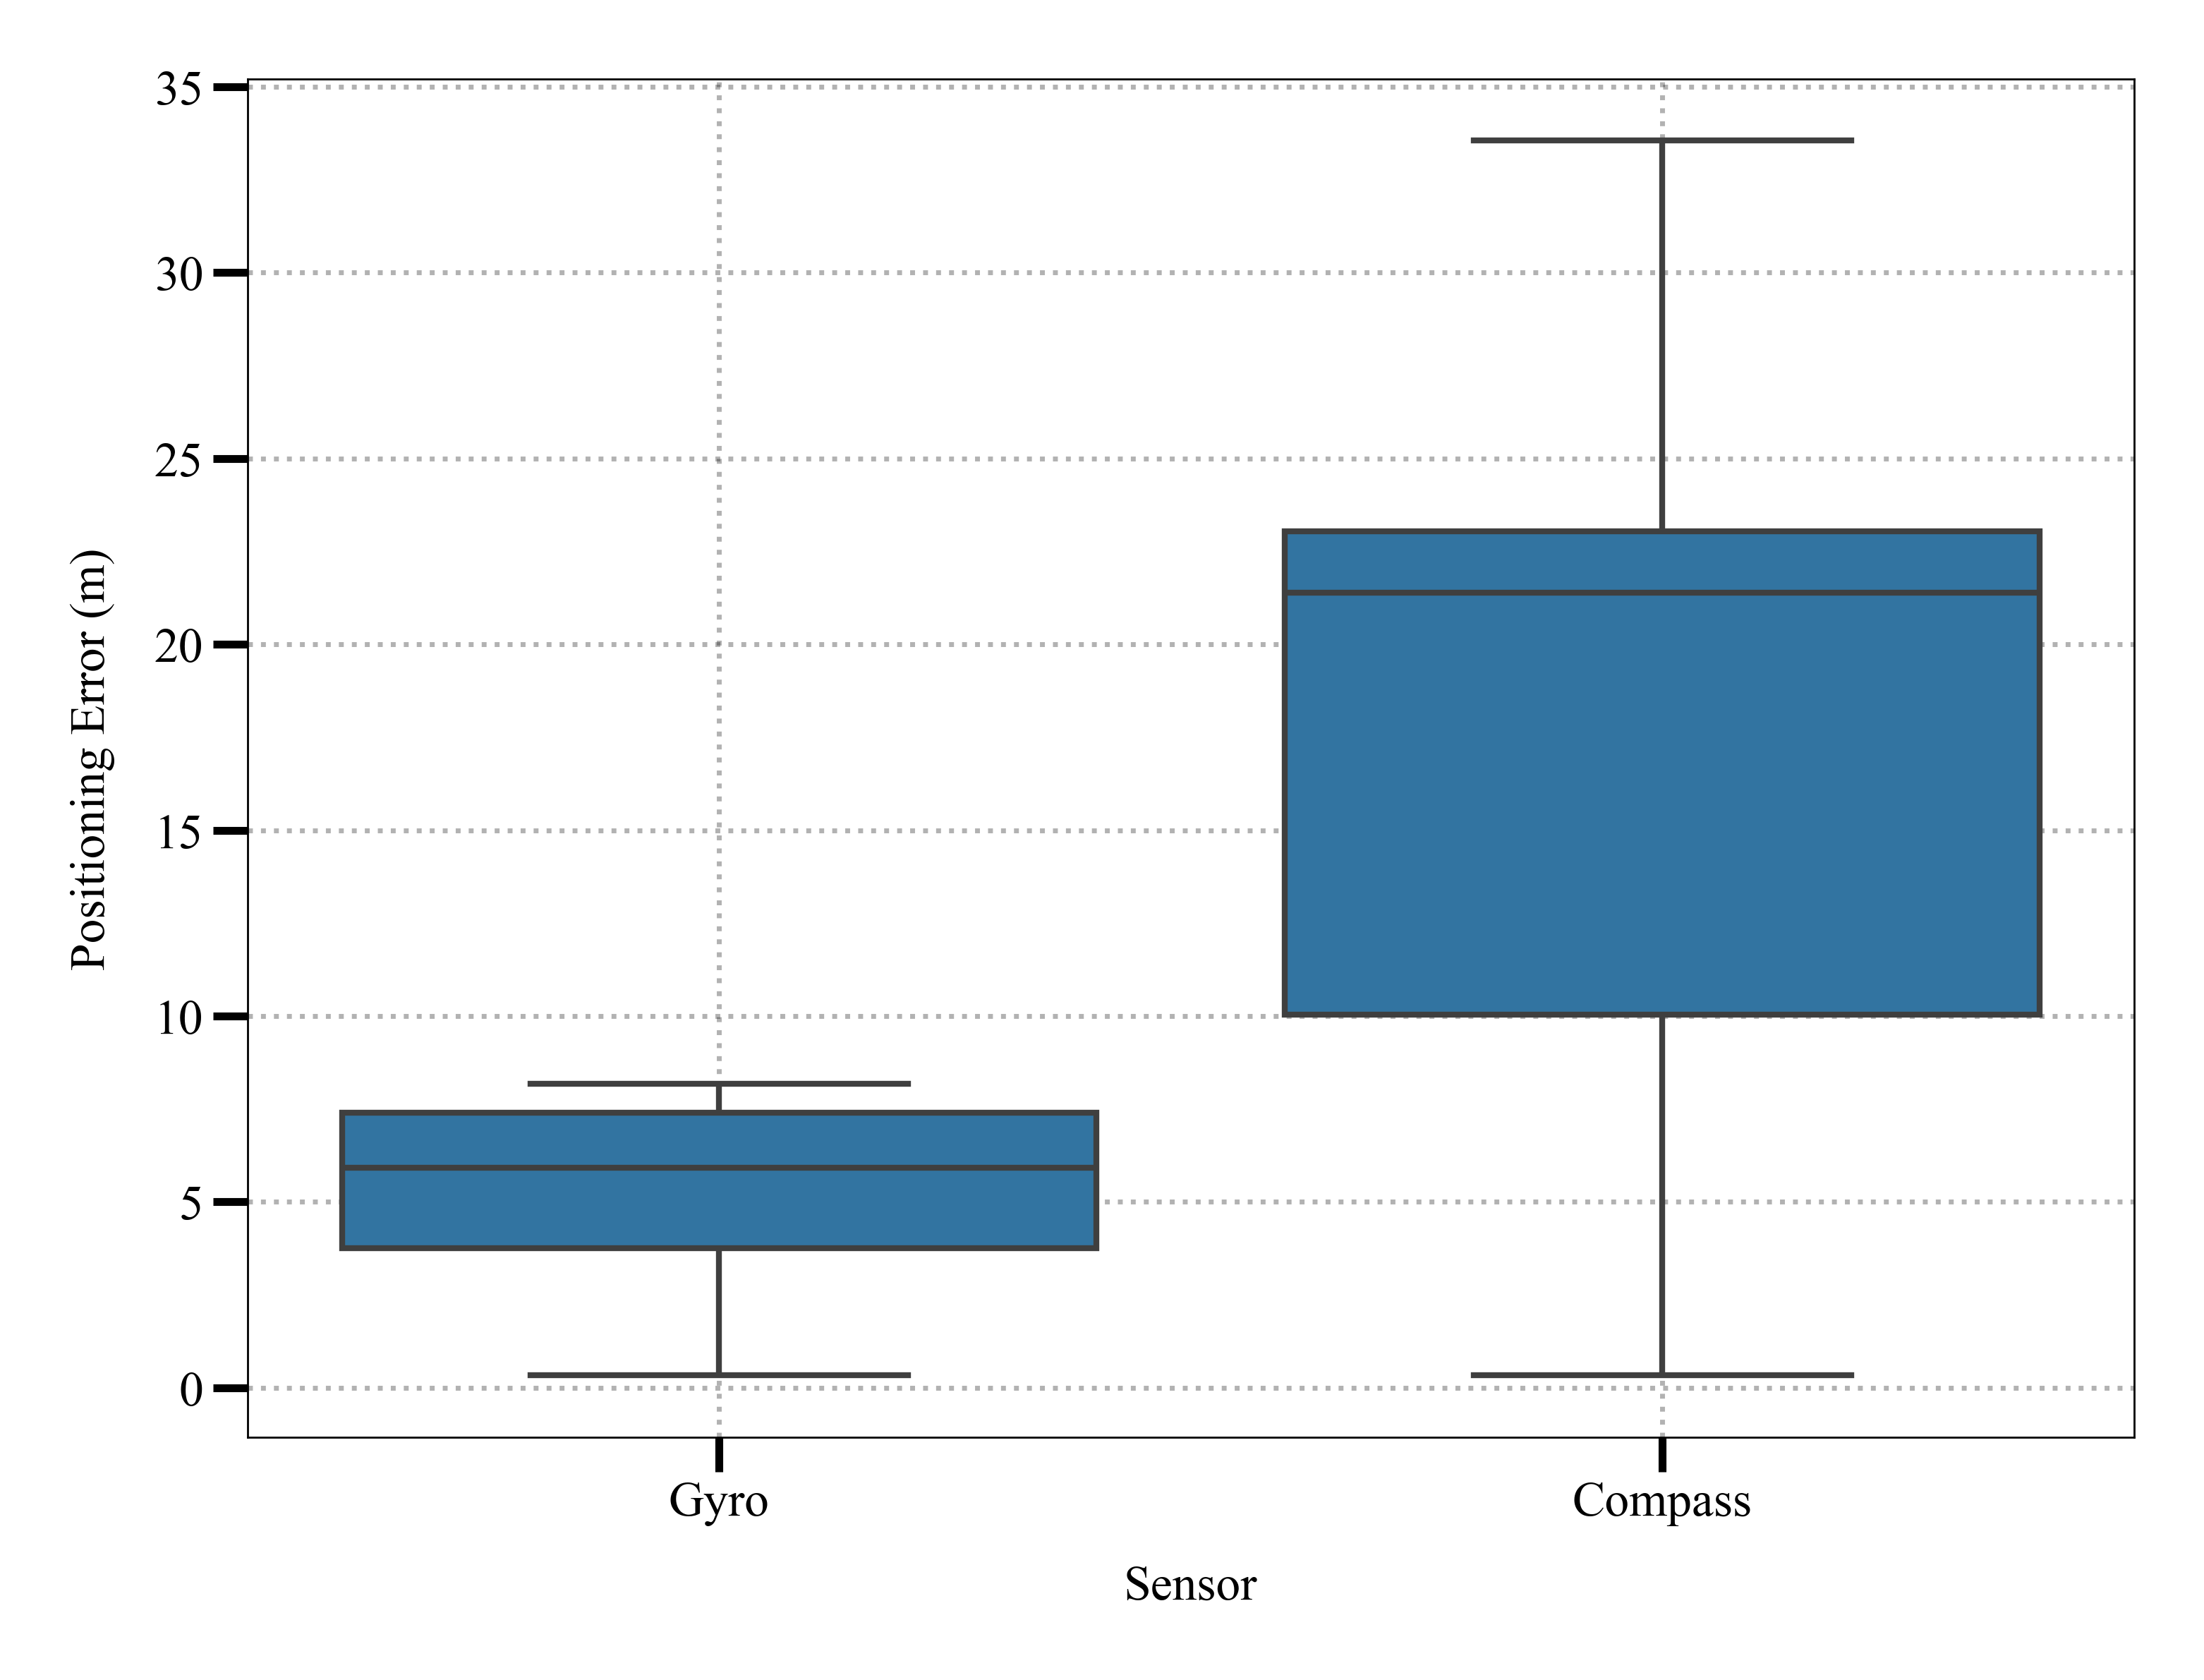

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import MultipleLocator



# Set IEEE-style plot parameters
fontSizeAll = 6
plt.rcParams.update({
    'xtick.major.pad': '1',
    'ytick.major.pad': '1',
    'legend.fontsize': 5,
    'legend.handlelength': 2,
    'font.size': 5,
    'axes.linewidth': 0.2,
    'patch.linewidth': 0.2,
    'font.family': "Times New Roman"
})

### **1. Plot Distance Error of Gyro vs Compass**
fig, ax1 = plt.subplots(figsize=(3.45, 2.5), dpi=1000)  # IEEE column width

ax1.plot(comapre['Walked_distance'], comapre['Gyro_Distance_Error'], 
         label='Gyro', linewidth=1.2, color='blue')
ax1.plot(comapre['Walked_distance'], comapre['Compass_Distance_Error'], 
         label='Compass', linewidth=1.2, color='red')

ax1.set_xlabel('Walked Distance (m)', labelpad=3)
ax1.set_ylabel('Positioning Error (m)', labelpad=3)

ax1.grid(True, linestyle=':', linewidth=0.5, alpha=0.3, color='k')
ax1.legend()

# Secondary x-axis for step numbers
secx = ax1.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
secx.set_xticks(comapre['Walked_distance'][::50])  
secx.set_xticklabels(comapre['step'][::50])  
secx.set_xlabel('Number of Walked Steps', labelpad=8)

# Axis formatting
ax1.xaxis.set_major_locator(MultipleLocator(50))  # Major ticks every 50 meters
ax1.yaxis.set_major_locator(MultipleLocator(5))   # Major ticks every 1 meter

plt.show()


### **2. ECDF Plot**
plt.figure(figsize=(3.45, 2.5), dpi=1000)  # IEEE column width

ecdf_gyro = sm.distributions.ECDF(comapre['Gyro_Distance_Error'])
ecdf_compass = sm.distributions.ECDF(comapre['Compass_Distance_Error'])

plt.plot(ecdf_gyro.x, ecdf_gyro.y, label='Gyro', color='blue', linewidth=1.2)
plt.plot(ecdf_compass.x, ecdf_compass.y, label='Compass', color='red', linewidth=1.2)

plt.xlabel('Positioning Error (m)', labelpad=3)
plt.ylabel('ECDF', labelpad=3)

plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.3, color='k')
plt.legend()

plt.show()


### **3. Box Plot for Positioning Errors**
# Create a DataFrame for distance errors
distance_errors_df = pd.DataFrame({
    'Sensor': ['Gyro'] * len(comapre) + ['Compass'] * len(comapre),
    'Distance_Error': np.concatenate([comapre['Gyro_Distance_Error'], comapre['Compass_Distance_Error']])
})

plt.figure(figsize=(3.45, 2.5), dpi=1000)  # IEEE column width

sns.boxplot(x='Sensor', y='Distance_Error', data=distance_errors_df, linewidth=0.6)

plt.xlabel('Sensor', fontsize=5)
plt.ylabel('Positioning Error (m)', fontsize=5)

plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.3, color='k')

plt.show()
